In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as py
import tensorflow as tf
import cv2

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L2

In [128]:
picture_size=48
folder_path="C:\\Users\\lenovo\\Downloads\\"

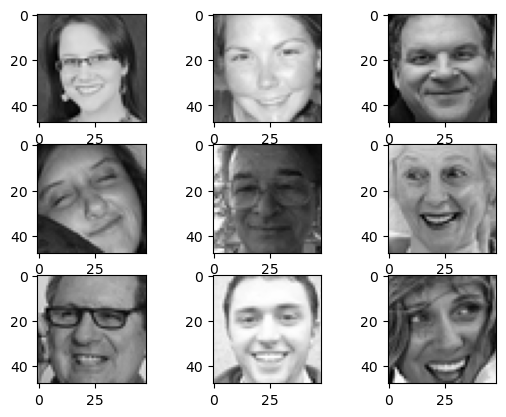

In [130]:
for i in range (1,10,1):
    plt.subplot(3,3,i)
    pic=cv2.imread(folder_path+"train\\happy\\im"+str(i-1)+".png")
    plt.imshow(pic)
    

In [132]:
batch_size=40
data_train=ImageDataGenerator()
data_test=ImageDataGenerator()
train_set=data_train.flow_from_directory(
        folder_path+"train",
        color_mode="grayscale",
        target_size=(picture_size, picture_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
test_set=data_test.flow_from_directory(
        folder_path+"test",
        color_mode="grayscale",
        target_size=(picture_size, picture_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

print(train_set.class_indices)


Found 805 images belonging to 4 classes.
Found 363 images belonging to 4 classes.
{'angry': 0, 'happy': 1, 'sad': 2, 'surprised': 3}


In [148]:
model = Sequential()

# First CNN layer
model.add(Conv2D(32, (3, 3), padding="same", activation='relu', 
                 input_shape=(48, 48, 1), kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Second CNN layer
model.add(Conv2D(64, (3, 3), padding="same", activation='relu',
                 kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Third CNN layer
model.add(Conv2D(128, (3, 3), padding="same", activation='relu',
                 kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation="softmax"))

In [150]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │              

 Total params: 1,308,420 (4.99 MB)

 Trainable params: 1,307,204 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [152]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])

In [154]:
early_stopping=tf.keras.callbacks. EarlyStopping(
monitor="val_loss",
min_delta=0.0001,
patience=20,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=True,
)    

In [156]:
epochs=50

In [158]:
history=model.fit(train_set,
epochs=epochs,
validation_data = test_set,
callbacks=early_stopping
)

model.save("emotionRecognition.h5")

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.2836 - loss: 10.2030 - val_accuracy: 0.2479 - val_loss: 19.0453
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.3160 - loss: 9.7989 - val_accuracy: 0.2837 - val_loss: 10.9047
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.3759 - loss: 9.4225 - val_accuracy: 0.2617 - val_loss: 10.5134
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.3763 - loss: 9.1034 - val_accuracy: 0.2672 - val_loss: 10.6702
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.3157 - loss: 8.9853 - val_accuracy: 0.3857 - val_loss: 8.5370
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.4171 - loss: 8.5106 - val_accuracy: 0.3967 - val_loss: 8.2151
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.4194 - loss: 8.2629 - val_accuracy: 0.3554 - val_loss: 7.9344
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.3952 - loss: 8.0454 - val_accura

In [160]:
test_loss, test_acc = model.evaluate(test_set)
print(test_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5533 - loss: 3.5088
0.5344352722167969
